# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

<IPython.core.display.Javascript object>


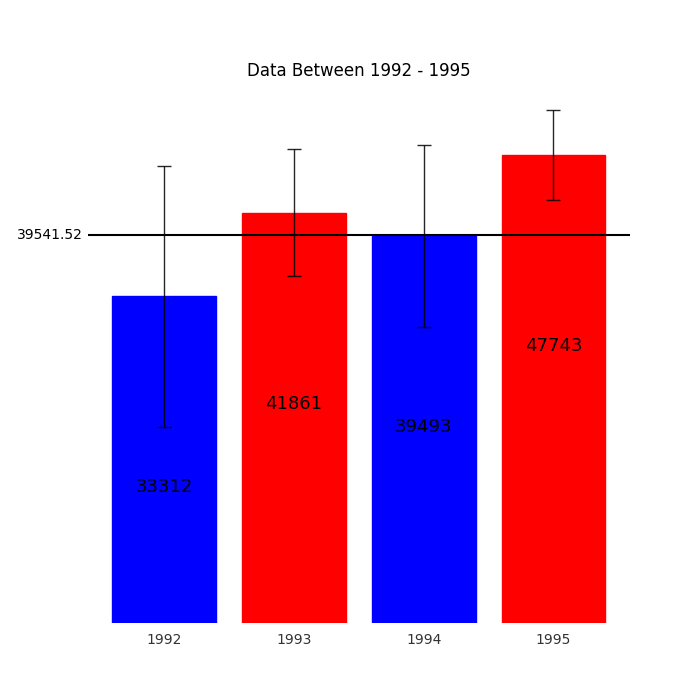

In [3]:
# Use the following data for this assignment:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#print(df)
#print(df.T.describe())

# this method considers all of the data (100% not 95%)
df['mean'] = df.mean(axis=1) # pandas.DataFrame.mean
#print(len(df['mean']))
df['std'] = df.std(axis=1) # pandas.DataFrame.std
# return unbiased standard error of the mean over requested axis or
'''The standard error (SE) of a statistic (usually an estimate of a parameter)
#is the standard deviation of its sampling distribution[1] or an estimate of
#that standard deviation. If the parameter or the statistic is the mean,
#it is called the standard error of the mean (SEM)'''
df['sem'] = df.sem(axis=1) # pandas.DataFrame.sem
df['imin'] = df['mean'] - 4*df['sem']
df['imax'] = df['mean'] + 4*df['sem']
df['yerr'] = 4*df['sem']
#print(df[['mean', 'imin', 'imax', 'yerr', 'std', 'sem']])
#print(type(df['mean'])) >>> <class 'pandas.core.series.Series'>

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
        
bars = plt.bar(range(len(df.index)), list(df['mean']), yerr=list(df['yerr']),
        error_kw={'capsize': 5, 'elinewidth': 1, 'alpha':0.85, 'ecolor':'black'})

#print(type(df.index)) >>> <class 'pandas.indexes.numeric.Int64Index'>
#print(type(df.columns)) >>> <class 'pandas.indexes.base.Index'>
#print(len(df.index)) >>> 4
#print(len(df.columns)) >>> 4

plt.xticks(range(len(df.index)), df.T.columns, alpha=0.8)
plt.title('Data Between 1992 - 1995')

# setting a horizontal line
yh = 39541.52
plt.axhline(y=yh, color = 'black', label = 'Y')
plt.text(-1.13, 39200, "39541.52", color='black')

# setting colors for the bars
for bar in bars:
    #print(bar.get_height())
    if bar.get_height() == yh:
        bar.set_color('white')
    if bar.get_height() > yh:
        bar.set_color('red')
    if bar.get_height() < yh:
        bar.set_color('blue')

'''Change the appearance of ticks, tick labels, and gridlines.
Tick properties that are not explicitly set using the keyword arguments remain unchanged unless reset is True.'''
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 20000, str(int(height)), 
                 ha='center', color='black', fontsize=13)

#my_cmap = plt.get_cmap("seismic")

plt.show()

<IPython.core.display.Javascript object>


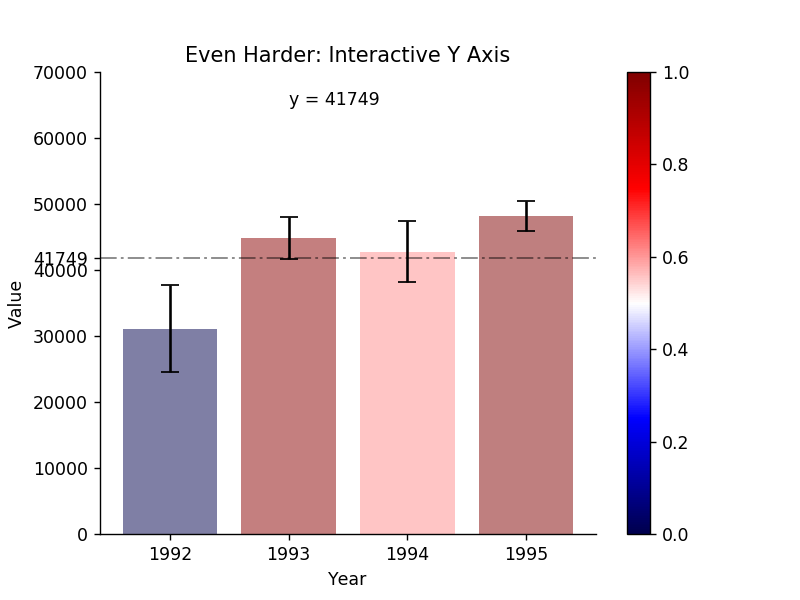

7

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm

%matplotlib notebook

# Use the following data for this assignment:


df = pd.DataFrame([
    np.random.normal(32000, 200000, 3650),
    np.random.normal(43000, 100000, 3650),
    np.random.normal(43500, 140000, 3650),
    np.random.normal(48000, 70000, 3650)
],index=[1992, 1993, 1994, 1995])

# Get the means and standard deviations
df_mean = df.mean(axis = 1)
df_std = df.std(axis = 1)
n = df.shape[1]

default_y = np.mean(df_mean.values)
# Compute color_map
def Color_Map(default_y, Conf_int):
    if default_y < np.min(Conf_int):
        result = 1.0
    elif default_y > np.max(Conf_int):
        result = 0.0
    else:
        result = (np.max(Conf_int) - default_y) / (np.max(Conf_int) - np.min(Conf_int))
    return result



# 95% Confidence Intervals
Radius = df_std / np.sqrt(n) * st.norm.ppf(1 - 0.05 / 2)
Conf_ints = []
for i in range(len(Radius)):
    Conf_ints.append((df_mean.iloc[i]-Radius.iloc[i],df_mean.iloc[i]+Radius.iloc[i]))

# Compute probabilities
Map_Value = [Color_Map(default_y, ci) for ci in Conf_ints]


# Setup the colormap
cmap = cm.get_cmap('seismic')
crange = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1))

# Setup the plot
plt.figure()
plt.title('Even Harder: Interactive Y Axis')
plt.xlabel('Year')
plt.ylabel('Value')

# draw the bar
bars = plt.bar(range(len(df)),
               df_mean,
               yerr = Radius,
               alpha=0.5,
               color=crange.to_rgba(Map_Value),
               capsize=5)

# Setup the ticks
plt.xticks(range(len(df)), df.index)
plt.yticks(np.arange(0, 80000, step=10000))
orignal_yticks = plt.gca().get_yticks()
new_yticks = np.append(orignal_yticks, default_y)
plt.gca().set_yticks(new_yticks)

# colorbar
crange.set_array([])
cbar = plt.colorbar(crange, orientation="vertical") 
# Turn off some plot rectangle spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Add the horizontal line
hoz_line = plt.axhline(y=default_y, color='black', linewidth=1,alpha = 0.5, linestyle='-.')
y_text = plt.text(1, 65000, 'y = %d' % default_y, bbox=dict(facecolor='white',edgecolor = 'None'))


# Add interactivity
def onclick(event):
    y = event.ydata
    hoz_line.set_ydata(event.ydata)
    y_text = plt.text(1, 65000, 'y = %d' % default_y, bbox=dict(facecolor='white',edgecolor = 'None'))
    
    new_yticks = np.append(orignal_yticks, y)
    plt.gca().set_yticks(new_yticks)
    
    Map_Value = [Color_Map(y, ci) for ci in Conf_ints]
    for i in range(len(df)):
        bars[i].set_color(crange.to_rgba(Map_Value[i]))

#interactive
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
